In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [2]:
df = sns.load_dataset('iris')

In [3]:

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()
df = df.drop_duplicates()

In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [8]:
df['species'] = df['species'].replace({'setosa':1, 'versicolor':2, 'virginica':0})
df['species'] = df['species'].astype('int64')

C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_28016\3297486683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':1, 'versicolor':2, 'virginica':0})


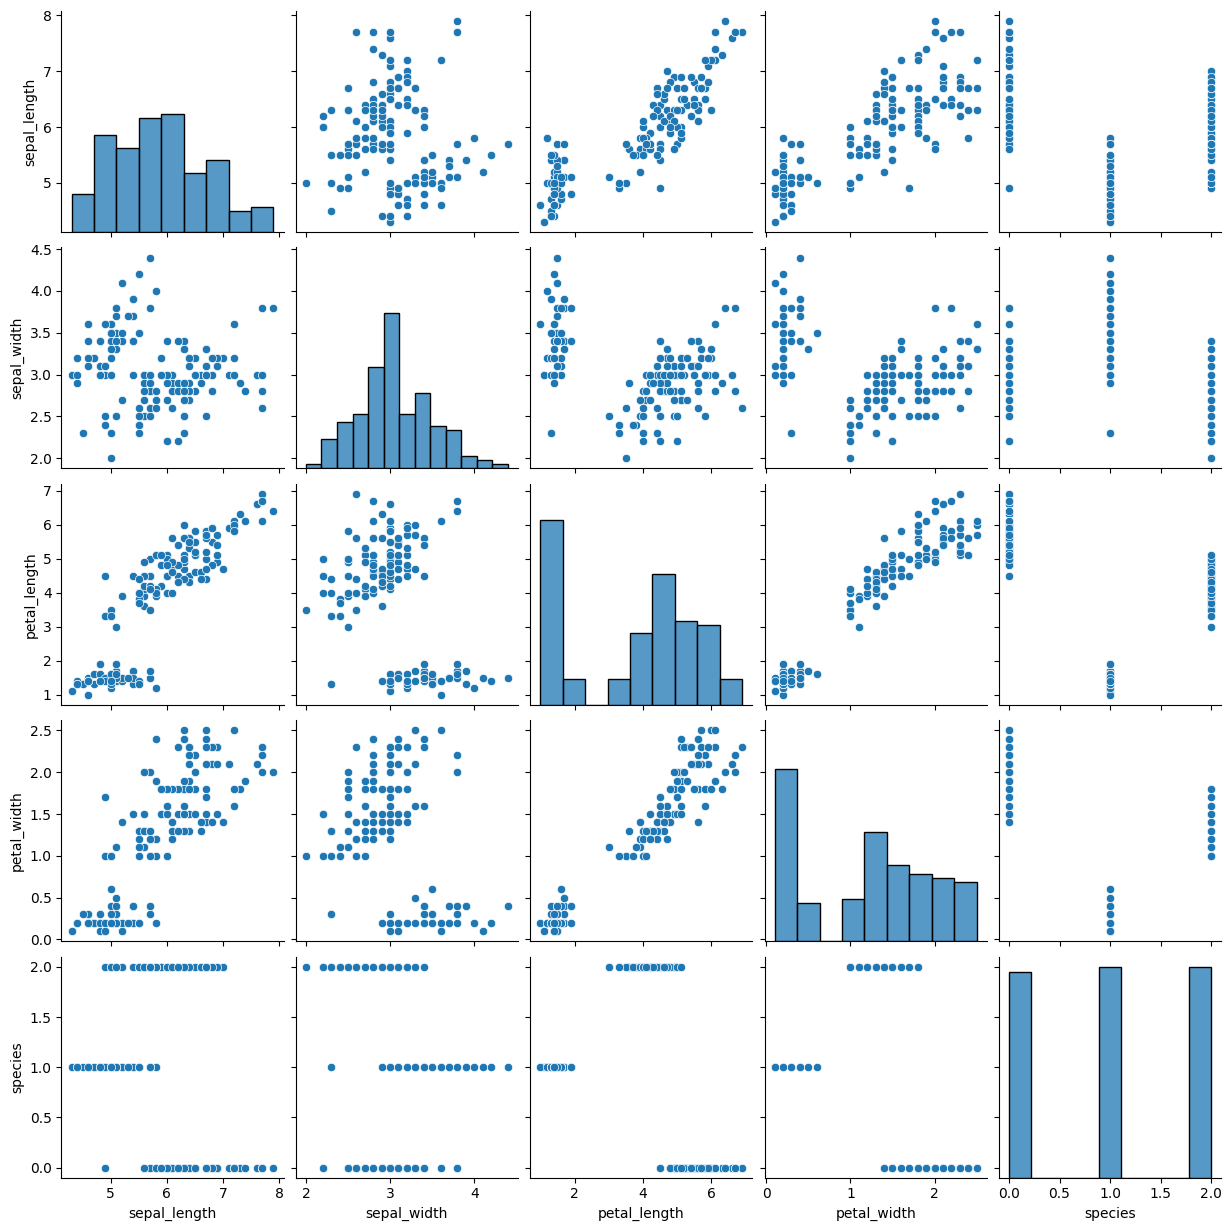

In [9]:
sns.pairplot(df)
plt.show()

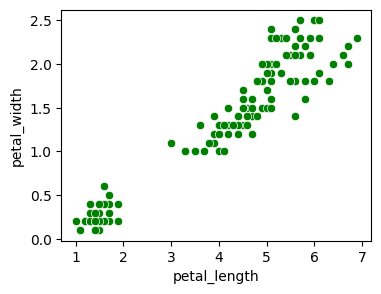

In [10]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='petal_length', y='petal_width', color='green')
plt.show()

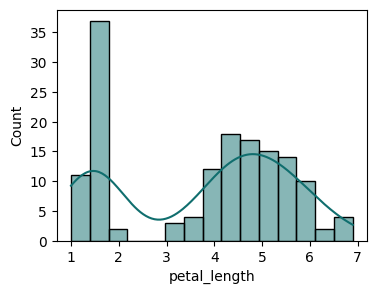

In [11]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='petal_length', color="#106E6E", kde=True, bins=15)
plt.show()

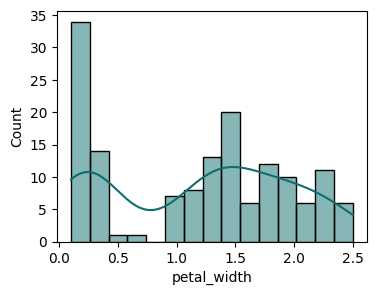

In [12]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='petal_width', color="#106E6E", kde=True, bins=15)
plt.show()

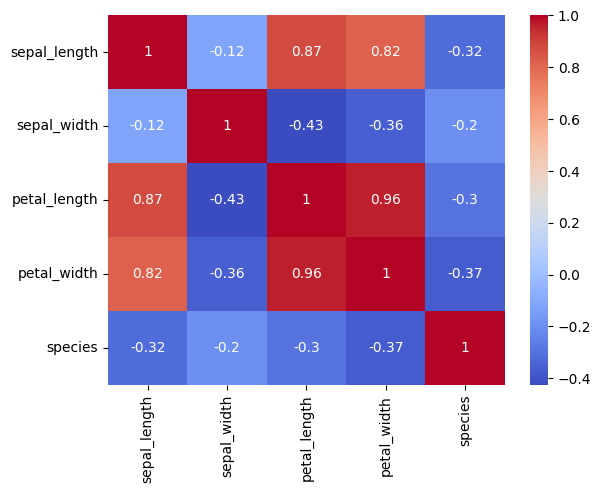

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
df_new = df.copy()

In [15]:
km = KMeans()
model = km.fit(df[['petal_length','petal_width']])
model

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [16]:
pred = model.predict(df[['petal_length','petal_width']])
pred

array([6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 1, 6, 6, 6, 1, 6, 6, 1, 1, 1, 1,
       6, 1, 1, 1, 1, 6, 6, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1,
       1, 6, 1, 6, 6, 6, 7, 7, 2, 3, 7, 7, 7, 5, 7, 3, 5, 3, 3, 7, 5, 7,
       7, 3, 7, 3, 2, 3, 2, 7, 7, 7, 7, 2, 7, 5, 3, 5, 3, 2, 7, 7, 7, 7,
       3, 3, 7, 7, 3, 5, 3, 3, 3, 7, 5, 3, 0, 2, 4, 4, 4, 0, 7, 0, 4, 0,
       2, 2, 4, 2, 4, 4, 4, 0, 0, 2, 4, 2, 0, 2, 4, 0, 2, 2, 4, 4, 0, 0,
       4, 2, 2, 0, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2], dtype=int32)

In [17]:
df['pred_plus'] = pred
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species,pred_plus
139,6.9,3.1,5.4,2.1,0,4
140,6.7,3.1,5.6,2.4,0,4
141,6.9,3.1,5.1,2.3,0,4
143,6.8,3.2,5.9,2.3,0,4
144,6.7,3.3,5.7,2.5,0,4
145,6.7,3.0,5.2,2.3,0,4
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,4
149,5.9,3.0,5.1,1.8,0,2


In [18]:
cluster_1 = model.cluster_centers_
cluster_1

array([[6.35454545, 2.12727273],
       [1.63529412, 0.32352941],
       [5.025     , 1.76      ],
       [4.0375    , 1.2375    ],
       [5.55909091, 2.14545455],
       [3.41428571, 1.05714286],
       [1.37272727, 0.20606061],
       [4.53478261, 1.42173913]])

In [19]:
df0 = df[df['pred_plus'] == 0]
df1 = df[df['pred_plus'] == 1]
df2 = df[df['pred_plus'] == 2]
df3 = df[df['pred_plus'] == 3]
df4 = df[df['pred_plus'] == 4]
df5 = df[df['pred_plus'] == 5]
df6 = df[df['pred_plus'] == 6]
df7 = df[df['pred_plus'] == 7]

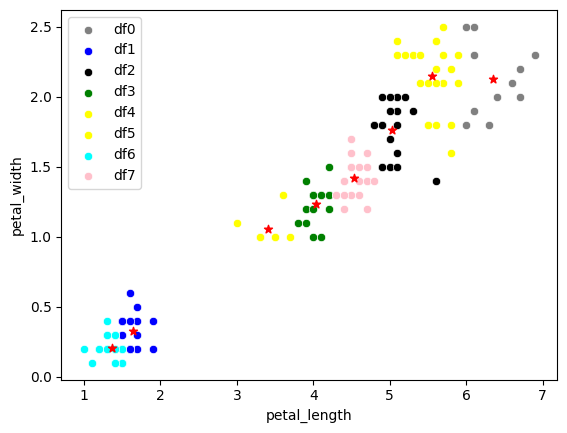

In [20]:
sns.scatterplot(x=df0.petal_length, y=df0.petal_width, color='gray', label='df0')
sns.scatterplot(x=df1.petal_length, y=df1.petal_width, color='blue', label='df1')
sns.scatterplot(x=df2.petal_length, y=df2.petal_width, color='black', label='df2')
sns.scatterplot(x=df3.petal_length, y=df3.petal_width, color='green', label='df3')
sns.scatterplot(x=df4.petal_length, y=df4.petal_width, color='yellow', label='df4')
sns.scatterplot(x=df5.petal_length, y=df5.petal_width, color='yellow', label='df5')
sns.scatterplot(x=df6.petal_length, y=df6.petal_width, color='cyan', label='df6')
sns.scatterplot(x=df7.petal_length, y=df7.petal_width, color='pink', label='df7')

plt.scatter(cluster_1[:,0], cluster_1[:, 1], color='red', label='Cluster', marker='*')
plt.show()

In [21]:
wcss = []
clus = range(2,15)
for k in clus:
    kme = KMeans(n_clusters=k)
    kme.fit(df[['petal_length','petal_width']])
    wcss.append(kme.inertia_)

In [22]:
wcss

[86.31128251300518,
 31.176721760797346,
 19.278502923976603,
 14.065129459706235,
 12.13366637911203,
 9.205271493952269,
 7.894778540903537,
 7.375318070818069,
 6.6055559342618135,
 5.184108734402852,
 4.665316276860394,
 4.457312738731854,
 4.3434857609710535]

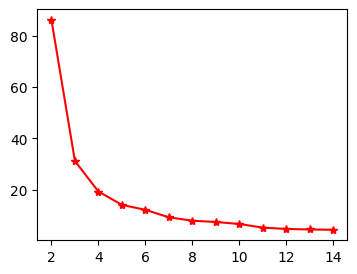

In [23]:
plt.figure(figsize=(4,3))
plt.plot(clus, wcss, color='red', marker='*')
plt.show()

In [24]:
knl = KneeLocator(clus, wcss, direction='decreasing', curve='convex')

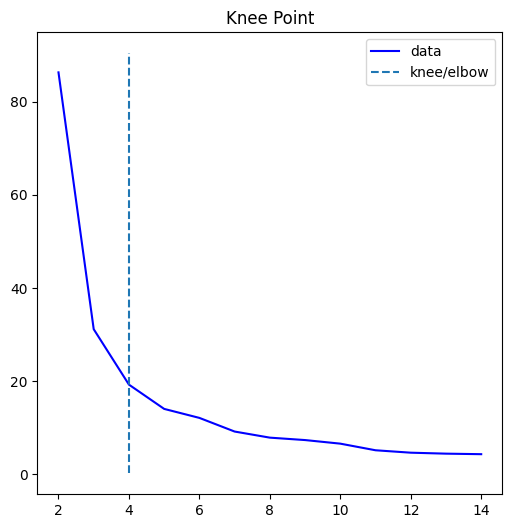

In [25]:
knl.plot_knee()

In [26]:
km_f = KMeans(n_clusters=4, algorithm='elkan')
final_model = km_f.fit(df[['petal_length','petal_width']])
final_model

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'elkan'


In [27]:
pred_f = final_model.predict(df[['petal_length','petal_width']])
pred_f

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3], dtype=int32)

In [28]:
df['final_pred_plus'] = pred_f
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species,pred_plus,final_pred_plus
145,6.7,3.0,5.2,2.3,0,4,1
146,6.3,2.5,5.0,1.9,0,2,3
147,6.5,3.0,5.2,2.0,0,2,1
148,6.2,3.4,5.4,2.3,0,4,1
149,5.9,3.0,5.1,1.8,0,2,3


In [29]:
center2 = final_model.cluster_centers_
center2

array([[3.884     , 1.192     ],
       [5.78611111, 2.10833333],
       [1.462     , 0.246     ],
       [4.73947368, 1.57894737]])

In [30]:
df['final_pred_plus'].value_counts()

final_pred_plus
2    50
3    38
1    36
0    25
Name: count, dtype: int64

In [31]:
score = silhouette_score(
    df[['petal_length','petal_width']],
    final_model.labels_
)
score

0.6171574298701815

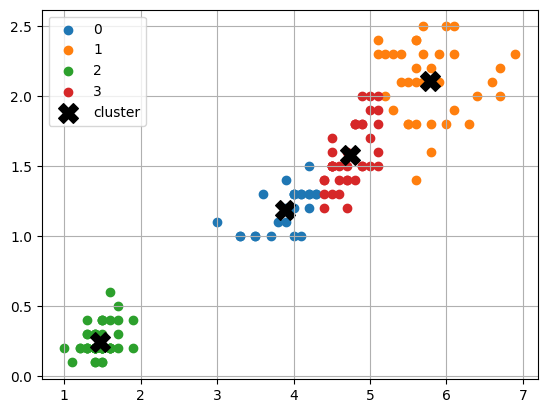

In [32]:
clusters = sorted(df['final_pred_plus'].unique())

for c in clusters:
    dfc = df[df['final_pred_plus'] == c]
    plt.scatter(
        dfc.petal_length,
        dfc.petal_width,
        label=f'{c}'
    )
plt.scatter(center2[:, 0], center2[:, 1], label='cluster', color='black', s=200, marker='X')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
'''k = 8
# ইউনিক ক্লাস্টার লেবেলগুলো sort করে নেওয়া
clusters = sorted(df['pred_plus'].unique())  # প্রতিটা ক্লাস্টার লেবেল সংগ্রহ

# প্রতিটা ক্লাস্টারের জন্য loop চালানো
for c in clusters:
    dfc = df[df['pred_plus'] == c]            # নির্দিষ্ট ক্লাস্টারের ডেটা ফিল্টার
    plt.scatter(
        dfc.petal_length,                     # x-axis এ petal_length
        dfc.petal_width,                      # y-axis এ petal_width
        label=f'Cluster {c}'                  # লেবেল সেট করা
    )

# centroid plot করা
plt.scatter(
    cluster_1[:, 0],                           # centroid এর x coordinate
    cluster_1[:, 1],                           # centroid এর y coordinate
    marker='*',                                # তারকা চিহ্ন
    s=200,                                     # সাইজ বড় করা
    label='Centroid'
)

plt.legend()                                   # legend দেখানো
plt.show()                                     # গ্রাফ দেখানো'''


"k = 8\n# ইউনিক ক্লাস্টার লেবেলগুলো sort করে নেওয়া\nclusters = sorted(df['pred_plus'].unique())  # প্রতিটা ক্লাস্টার লেবেল সংগ্রহ\n\n# প্রতিটা ক্লাস্টারের জন্য loop চালানো\nfor c in clusters:\n    dfc = df[df['pred_plus'] == c]            # নির্দিষ্ট ক্লাস্টারের ডেটা ফিল্টার\n    plt.scatter(\n        dfc.petal_length,                     # x-axis এ petal_length\n        dfc.petal_width,                      # y-axis এ petal_width\n        label=f'Cluster {c}'                  # লেবেল সেট করা\n    )\n\n# centroid plot করা\nplt.scatter(\n    cluster_1[:, 0],                           # centroid এর x coordinate\n    cluster_1[:, 1],                           # centroid এর y coordinate\n    marker='*',                                # তারকা চিহ্ন\n    s=200,                                     # সাইজ বড় করা\n    label='Centroid'\n)\n\nplt.legend()                                   # legend দেখানো\nplt.show()                                     # গ্রাফ দেখানো"

# with 4 column

In [34]:
df_new.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [35]:
wcss_new = []
clusters_new = range(2, 15)
for k in clusters_new:
    km_new = KMeans(n_clusters=k)
    model_new = km_new.fit(df_new[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    wcss_new.append(model_new.inertia_)

In [36]:
wcss_new

[151.9968671383648,
 78.11184615384619,
 56.83295398351648,
 46.02692857142857,
 38.792,
 34.457540488922845,
 36.300583333333336,
 30.62877623546045,
 27.403764932435987,
 24.786960355434047,
 23.684346881060122,
 21.857802181736396,
 20.966657734422444]

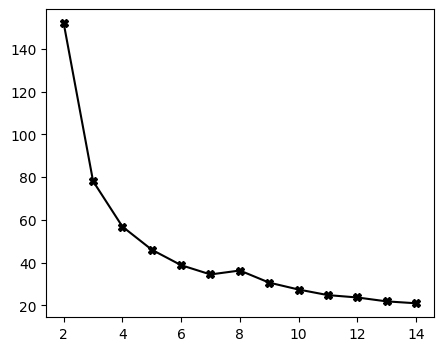

In [37]:
plt.figure(figsize=(5,4))
plt.plot(clusters_new, wcss_new, color='black', marker='X')

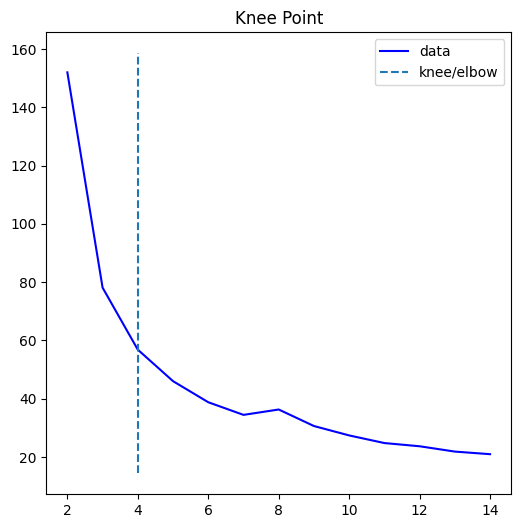

In [38]:
knl_new = KneeLocator(clusters_new, wcss_new, curve='convex', direction='decreasing')
knl_new.plot_knee()

In [39]:
km_new_f = KMeans(n_clusters=3)
model_n_f = km_new_f.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
model_n_f

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [40]:
pred_n = model_n_f.predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
pred_n

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [41]:
df_new['pred_plus'] = pred_n
df_new.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pred_plus
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


In [42]:
center_n = model_n_f.cluster_centers_
center_n

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.90327869, 2.74918033, 4.38196721, 1.42622951]])

In [43]:
df_new['pred_plus'].value_counts()

pred_plus
2    61
1    50
0    38
Name: count, dtype: int64

In [44]:
new_score = silhouette_score(
    df_new[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],
    model_n_f.labels_
)
new_score

0.5552928210895685

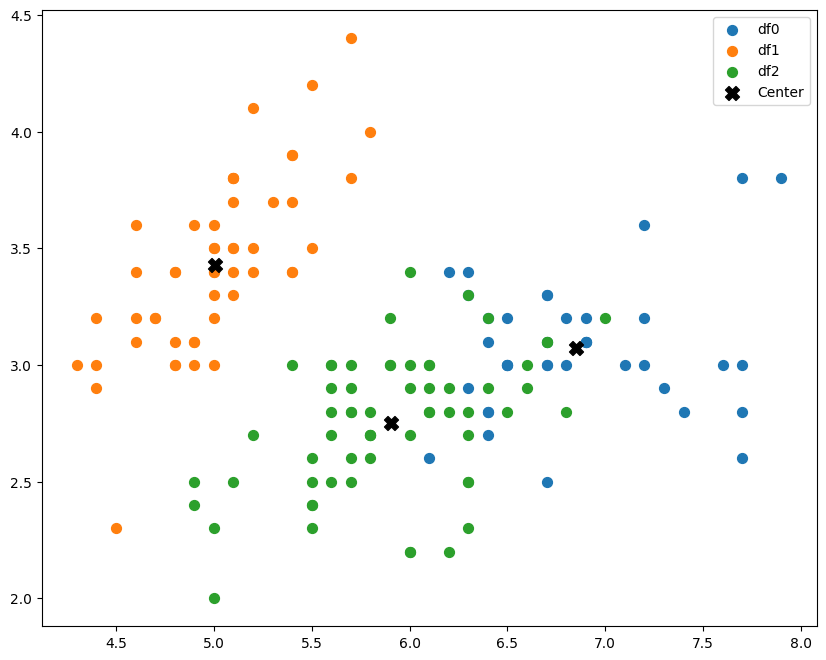

In [45]:
clusters_new_2 = sorted(df_new['pred_plus'].unique())

plt.figure(figsize=(10,8))
for d in clusters_new_2:
    dfd = df_new[df_new['pred_plus'] == d]
    plt.scatter(
        dfd.sepal_length,
        dfd.sepal_width,
        label=f'df{d}',
        s=50
    )
plt.scatter(center_n[:, 0], center_n[:, 1],label='Center', color='black', marker='X', s=100)
plt.legend()
plt.show()

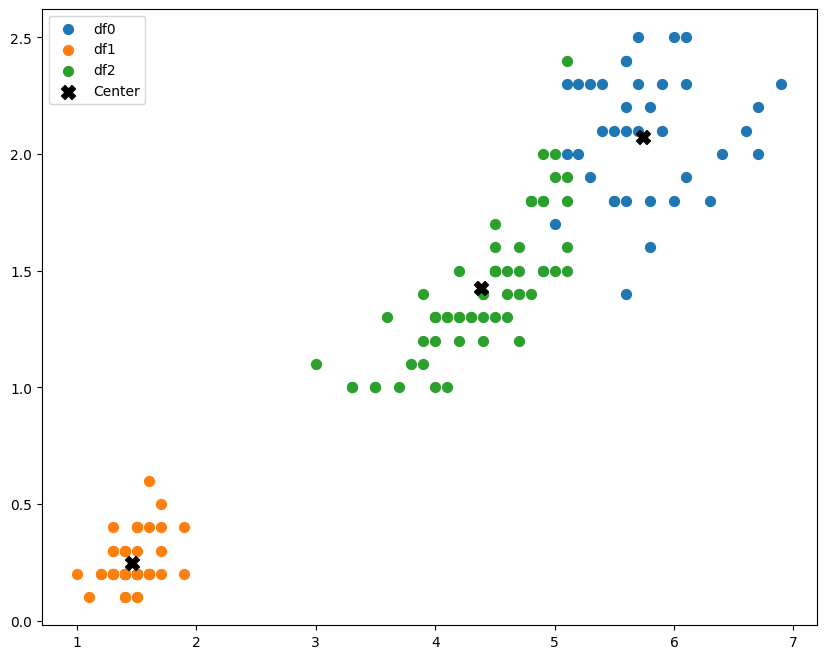

In [46]:
clusters_new_2 = sorted(df_new['pred_plus'].unique())

plt.figure(figsize=(10,8))
for d in clusters_new_2:
    dfd = df_new[df_new['pred_plus'] == d]
    plt.scatter(
        dfd.petal_length,
        dfd.petal_width,
        label=f'df{d}',
        s=50
    )
plt.scatter(center_n[:, 2], center_n[:, 3],label='Center', color='black', marker='X', s=100)
plt.legend()
plt.show()